In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Import Libraries

In [8]:
SEED = 1221

# Important libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Model libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Dealing with imbalance data
from imblearn.over_sampling import SMOTE

# 2. Load Datasets

In [25]:
# Load the training and test data
train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Hackathon23/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Hackathon23/Test.csv')
variable_def = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Hackathon23/Variable_Definitions.csv')

# 3. Explorative analysis

In [12]:
for feature, description in variable_def.values:
  print(f'{feature} :  {description}')

I/O Data Operations :  Speed at which the process is issuing read and write I/O operations
I/O Data Bytes :  Speed at which the process is reading and writing bytes in I/O operations
Number of subprocesses :  Number of sub-processes that are currently active in a parent process
Time on processor :  The total time, in seconds, that a process has been running
Disk Reading/sec :  Speed of disk reading operations
Disc Writing/sec :  Speed of writing operations to disk
Confirmed byte radius :  The ratio of Memory/Bytes committed and Memory/Confirmation limit
Pages Read/sec :  Speed rate at which the disk was read in order to resolve hard page errors
Pages Input/sec :  Speed at which pages are written to disk to free up space in physical memory
Page Errors/sec :  This is the average number of pages with faults per second
Bytes Sent :  The rate at which bytes leave the browser’s HTTP requests
Received Bytes (HTTP) :  Speed of bytes arriving to the browser’s HTTP responses
Network packets sent

In [13]:
# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [14]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [15]:
# Shape of train set
train.shape

(8908, 16)

In [16]:
# Shape of test set
test.shape

(3818, 15)

In [17]:
# Check null values
train.isnull().sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

Neither of the train dataset columns has no null values.

# 4. Statistical Summaries

In [18]:
train.describe(include="all")

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


In [19]:
print(f"Label 1 are {len(train[train['Label']==1])} Labal 0 are {len(train[train['Label']==0])}")

Label 1 are 2404 Labal 0 are 6504


# 5. Data viz

In [20]:
# Count of Target (labels)

px.histogram(train['Label'], color=train['Label'], nbins=3)

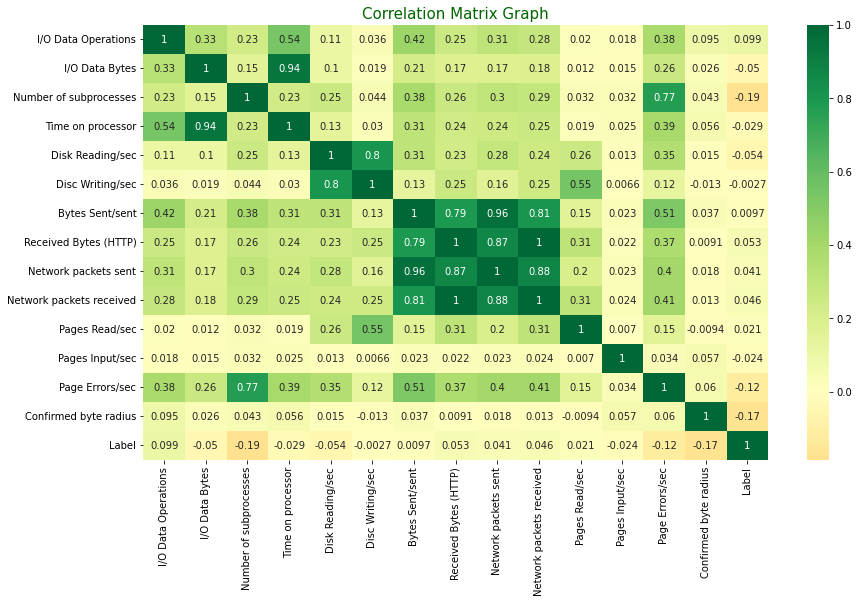

In [21]:
# Correration matrix
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), cmap="RdYlGn", annot=True, center=0)
plt.title('Correlation Matrix Graph', fontsize = 15, color = 'darkgreen')
plt.show()

In [22]:
# Calculate the correlation coefficients between all columns and the label column
correlations = train.corr()['Label']

print(correlations.sort_values(ascending=False))

Label                       1.000000
I/O Data Operations         0.099165
Received Bytes (HTTP)       0.052535
Network packets received    0.045522
Network packets sent        0.041176
Pages Read/sec              0.020558
Bytes Sent/sent             0.009655
Disc Writing/sec           -0.002698
Pages Input/sec            -0.024041
Time on processor          -0.029156
 I/O Data Bytes            -0.050343
Disk Reading/sec           -0.053590
Page Errors/sec            -0.117415
Confirmed byte radius      -0.174451
Number of subprocesses     -0.185420
Name: Label, dtype: float64


# 6. Model

In [26]:
train.drop('ID', axis=1, inplace=True)

# Split the data into features and labels
X = train.drop('Label', axis=1)
y = train['Label']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Handle imbalance using SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Tune hyperparameters
clf = xgb.XGBClassifier(
    objective='binary:logistic', 
    random_state=SEED,
    eval_metric='logloss',
    max_depth=10, 
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.006
)
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)], verbose=100)

# Predict the labels on the test data
X_test = scaler.transform(test.drop('ID', axis=1))
y_pred = clf.predict(X_test)

# Save the predicted labels to a CSV file
output_df = pd.DataFrame({'ID': test['ID'], 'Label': y_pred})
output_df.to_csv('/content/drive/MyDrive/ColabNotebooks/Hackathon23/Hackathon23/submission.csv', index=False)

# Print classification report
print(classification_report(y_val, clf.predict(X_val)))


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-logloss:0.62459
[100]	validation_0-logloss:0.08252
[200]	validation_0-logloss:0.07151
[300]	validation_0-logloss:0.06934
[398]	validation_0-logloss:0.06852
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       651
           1       0.94      0.97      0.95       240

    accuracy                           0.98       891
   macro avg       0.97      0.97      0.97       891
weighted avg       0.98      0.98      0.98       891

